In [1]:
import sys

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [3]:
#load_files need a particular structure: subfolders = class / categories, and files inside subfolders are training data
languages_data_folder = '../paragraphs'
dataset = load_files(languages_data_folder)

In [21]:
#what is avaialble in the dataset object?
dataset.target_names

['ar', 'de', 'en', 'es', 'fr', 'it', 'ja', 'nl', 'pl', 'pt', 'ru']

In [8]:
#this splits the datasets into 50/50 for training and testing
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.5)

In [9]:
#this step will turn text into tokens. TfidfVectorizer will look at combination of chars
vectorizer = TfidfVectorizer(ngram_range=(1, 3), analyzer='char',
                             use_idf=False)

In [10]:
#builds an empty pipeline using above vectorizer
#perceptron is a simple learning model. [link text](https://www.w3schools.com/ai/ai_perceptrons.asp)
#key idea is that individual decision is weighted and multiplied to compare with a threshold
clf = Pipeline([
    ('vec', vectorizer),
    ('clf', Perceptron()),
])


In [12]:
#this allows the pipeline to adjust to training data
clf.fit(docs_train, y_train)

Pipeline(steps=[('vec',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3),
                                 use_idf=False)),
                ('clf', Perceptron())])

In [13]:
#this allows the model to predict y based on test data
y_predicted = clf.predict(docs_test)

In [14]:
#evaluates the performance of the classifier
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

              precision    recall  f1-score   support

          ar       1.00      1.00      1.00        23
          de       1.00      0.99      0.99        90
          en       0.99      1.00      0.99        87
          es       1.00      0.97      0.98        61
          fr       1.00      0.99      0.99        71
          it       0.98      0.98      0.98        45
          ja       1.00      1.00      1.00        38
          nl       1.00      1.00      1.00        17
          pl       1.00      1.00      1.00        28
          pt       1.00      1.00      1.00        57
          ru       0.91      1.00      0.95        30

    accuracy                           0.99       547
   macro avg       0.99      0.99      0.99       547
weighted avg       0.99      0.99      0.99       547



In [15]:
#this matrix shows the actual output
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[23  0  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  0  0  1]
 [ 0  0 87  0  0  0  0  0  0  0  0]
 [ 0  0  0 59  0  1  0  0  0  0  1]
 [ 0  0  0  0 70  0  0  0  0  0  1]
 [ 0  0  1  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0  0  0  0 57  0]
 [ 0  0  0  0  0  0  0  0  0  0 30]]


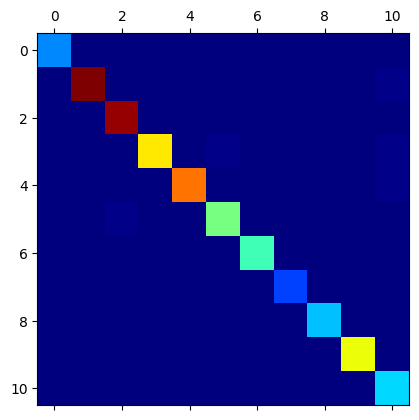

In [16]:
#this is a heat map for the same thing
import matplotlib.pyplot as plt
plt.matshow(cm, cmap=plt.cm.jet)
plt.show()


In [19]:
#the actual prediction
sentences = [
    'Using the results of the previous exercises and the cPickle module of the standard library, write a command line utility that detects the language of some text provided on stdin and estimate the polarity (positive or negative) if the text is written in English.',
    'Ceci est un test de d\xe9tection de la langue.',
    'Dies ist ein Test, um die Sprache zu erkennen.',
]
predicted = clf.predict(sentences)


In [20]:
#prints out the actual outcome.
for s, p in zip(sentences, predicted):
    print('The language of "%s" is "%s"' % (s, dataset.target_names[p]))


The language of "Using the results of the previous exercises and the cPickle module of the standard library, write a command line utility that detects the language of some text provided on stdin and estimate the polarity (positive or negative) if the text is written in English." is "en"
The language of "Ceci est un test de détection de la langue." is "fr"
The language of "Dies ist ein Test, um die Sprache zu erkennen." is "de"
